# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import files


# reads CSV file
tobaco_df = pd.read_csv('Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv')

# Load JSON data from the URL
url = 'https://data.cdc.gov/resource/8mrp-rmkw.json'
Nutritional_df = pd.read_json(url)

# Basic statistics for CSV dataset
tobaco_rows, tobaco__cols = tobaco_df.shape
print(f"tobaco Dataset: {tobaco_rows} rows and {tobaco__cols} columns.")

# Basic statistics for JSON dataset
Nutritional_df_rows, Nutritional_df_cols = Nutritional_df.shape
print(f"Nutritional Dataset: {Nutritional_df_rows} rows and {Nutritional_df_cols} columns.")

tobaco Dataset: 43341 rows and 31 columns.
Nutritional Dataset: 636 rows and 24 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [55]:
# unique values in the tobaco dataframe
unique_counts_tobaco = tobaco_df.nunique()

#column with the greatest number of unique values.
column_with_most_unique_tobaco = unique_counts_tobaco.idxmax()

# Prints the results for the tobaco_df DataFrame.
print("Number of unique values for each column in tobaco_df:")
print(unique_counts_tobaco)
print("\nColumn with the greatest number of unique values in tobaco_df:", column_with_most_unique_tobaco)


# Convert columns with dictionaries to strings before applying nunique
for col in Nutritional_df.columns:
    if Nutritional_df[col].apply(type).eq(dict).any():  # Checks if column contains dictionaries
        Nutritional_df[col] = Nutritional_df[col].astype(str)


# number of unique values for each column in the Nutritional_df DataFrame.
unique_counts_nutritional = Nutritional_df.nunique()

# column with the greatest number of unique values.
column_with_most_unique_nutritional = unique_counts_nutritional.idxmax()

# Prints the results for the Nutritional_df DataFrame.
print("\nNumber of unique values for each column in Nutritional_df:")
print(unique_counts_nutritional)
print("\nColumn with the greatest number of unique values in Nutritional_df:", column_with_most_unique_nutritional)




Number of unique values for each column in tobaco_df:
YEAR                            17
LocationAbbr                    54
LocationDesc                    54
TopicType                        1
TopicDesc                        4
MeasureDesc                     10
DataSource                       1
Response                         6
Data_Value_Unit                  1
Data_Value_Type                  1
Data_Value                     995
Data_Value_Footnote_Symbol       1
Data_Value_Footnote              1
Data_Value_Std_Err             134
Low_Confidence_Limit           989
High_Confidence_Limit          999
Sample_Size                   7979
Gender                           3
Race                             6
Age                              8
Education                        4
GeoLocation                     53
TopicTypeId                      1
TopicId                          4
MeasureId                       14
StratificationID1                3
StratificationID2                8
S

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [56]:
def find_constant_columns(df):
  constant_columns = []
  for column in df.columns:
    if df[column].nunique() == 1:
      constant_columns.append(column)
  return constant_columns

# printing it out
constant_columns_tobaco = find_constant_columns(tobaco_df)
print("Columns with constant values in tobaco_df:", constant_columns_tobaco)

constant_columns_nutritional = find_constant_columns(Nutritional_df)
print("Columns with constant values in Nutritional_df:", constant_columns_nutritional)

Columns with constant values in tobaco_df: ['TopicType', 'DataSource', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'TopicTypeId']
Columns with constant values in Nutritional_df: ['datasource', 'class', 'topic', 'question', 'data_value_type', 'total', 'classid', 'topicid', 'questionid', 'datavaluetypeid', 'stratificationcategory1', 'stratification1', 'stratificationcategoryid1', 'stratificationid1']


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [57]:
# sorting out numeric columns
numeric_columns_tobaco = tobaco_df.select_dtypes(include=['number'])
numeric_columns_nutritional = Nutritional_df.select_dtypes(include=['number'])

In [58]:
numeric_columns_tobaco.head()

,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
0,30.0,2.3,25.4,34.6,692.0,21
1,16.1,NaN,NaN,NaN,NaN,27
2,58.2,NaN,NaN,NaN,NaN,28
3,0.5,0.4,0.0,1.2,123.0,69
4,21.9,4.9,12.4,31.4,209.0,22


In [59]:
numeric_columns_nutritional.head()

,yearstart,yearend,data_value,data_value_alt,low_confidence_limit,high_confidence_limit,locationid
0,2010,2010,9.2,9.2,8.2,10.2,2
1,2010,2010,1.4,1.4,1.1,1.7,1
2,2010,2010,1.9,1.9,1.6,2.2,5
3,2010,2010,2.9,2.9,2.6,3.2,4
4,2010,2010,3.7,3.7,3.5,3.9,6


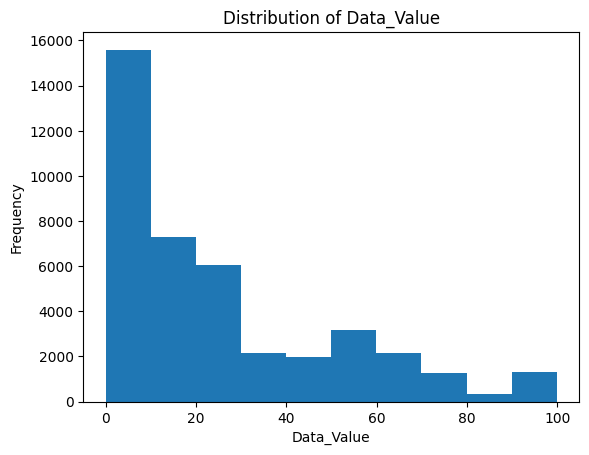

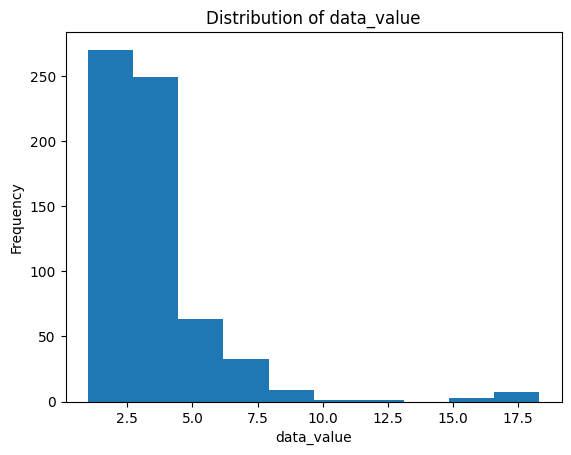

In [60]:
# numeric column in tobaco dataframe
numeric_column = 'Data_Value'
plt.hist(tobaco_df[numeric_column], bins=10)
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.title('Distribution of ' + numeric_column)
plt.show()


# numeric column in nutritional dataframe
numeric_column = 'data_value'
plt.hist(Nutritional_df[numeric_column], bins=10)
plt.xlabel(numeric_column)
plt.ylabel('Frequency')
plt.title('Distribution of ' + numeric_column)
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

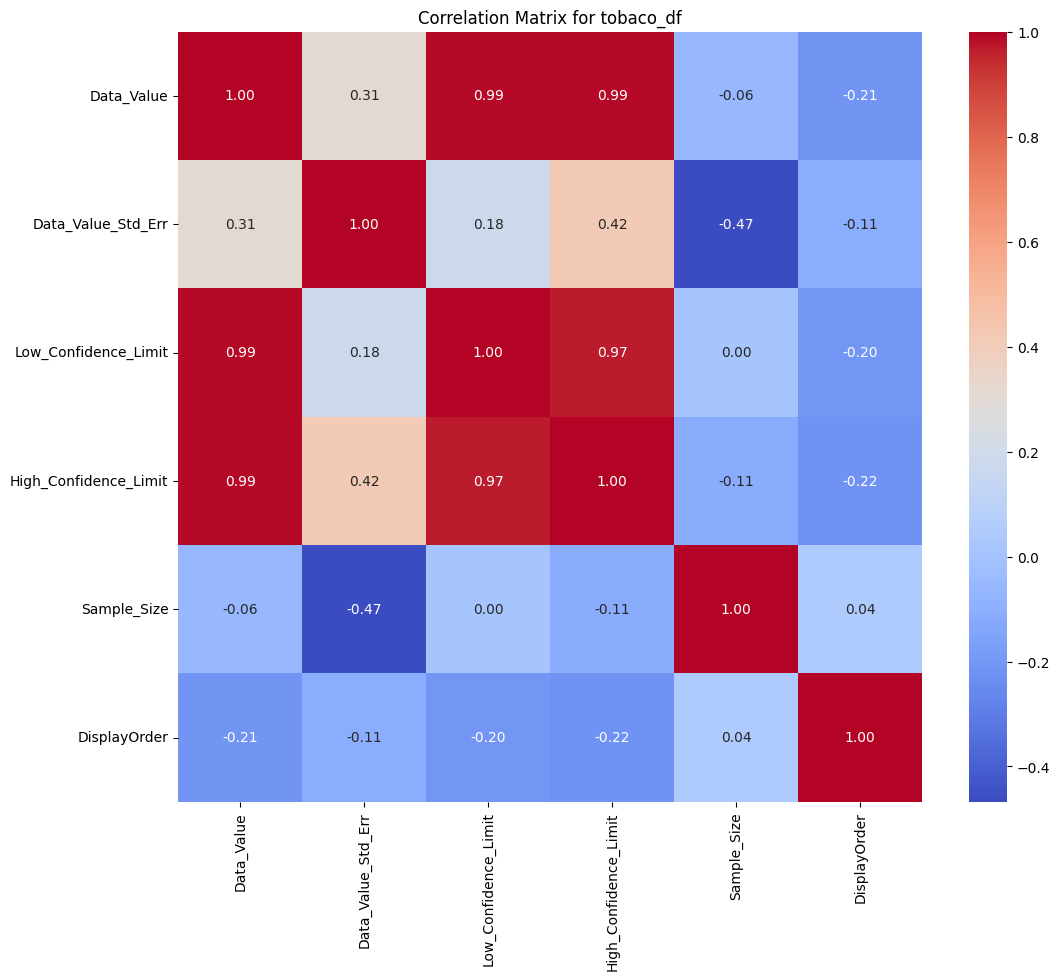

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

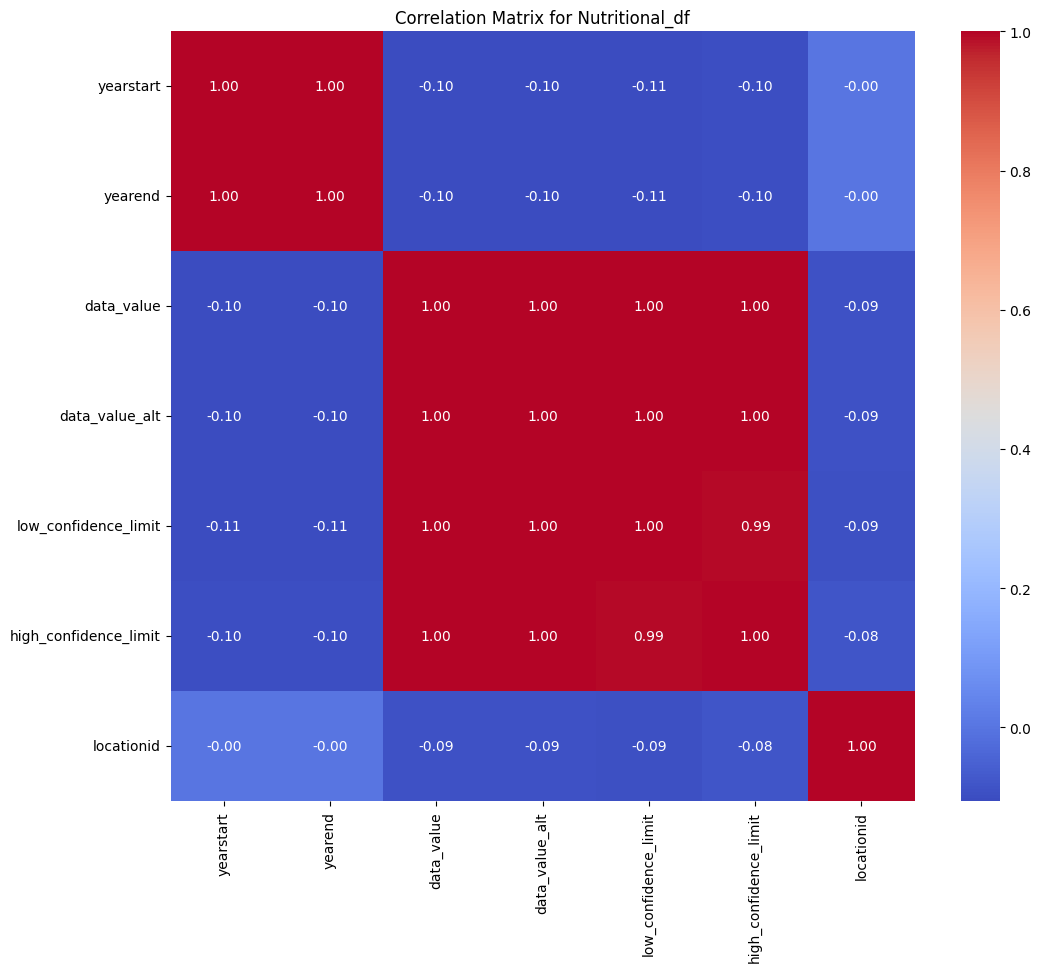

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [61]:
#Correlation analysis for numerical features

# For tobaco_df
numeric_tobaco = tobaco_df.select_dtypes(include=['number'])
correlation_matrix_tobaco = numeric_tobaco.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_tobaco, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for tobaco_df')
plt.show()




# For Nutritional_df
numeric_nutritional = Nutritional_df.select_dtypes(include=['number'])
correlation_matrix_nutritional = numeric_nutritional.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_nutritional, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Nutritional_df')
plt.show()





---



## Submitting Your Work

Submit your work as usual.